In [1]:

# Numpy Library for Numerical Calculations
import numpy as np

# Pandas Library for Dataframe
import pandas as pd

# Matplotlib and for Plottings
import matplotlib.pyplot as plt

# Pickle Library for Saving the Model
import pickle

# RE Library for Regular Expression
import re

# NLTK Library for Natural Language Processing
import nltk
nltk.download('stopwords') # Downloading the Stopwords

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Stopwords for removing stopwords in the Text
from nltk.corpus import stopwords

# PorterStemmer for Stemming the Words
from nltk.stem.porter import PorterStemmer

# CountVectorizer for Bagging of Words and Vectorizing it
from sklearn.feature_extraction.text import CountVectorizer

# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split

# Decision Tree Classifier, Random Forest Classifier and Multinomial Naïve Bayes are Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Accuracy Score and Confusion Matrix is for Analysis of Models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
spam = pd.read_csv("/content/drive/MyDrive/mailspam.csv", encoding='ISO-8859-1')
spam.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


Checking for null values in Data

In [4]:
spam.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [5]:
# Dataset Duplicate Value Count
dup = spam.duplicated().sum()
print(f'number of duplicated rows are {dup}')


number of duplicated rows are 403


In [6]:
#Dataset Columns
spam.columns


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
# Dataset Describe (all columns included)
spam.describe(include= 'all').round(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


Checking for first 5 Values in Data

In [8]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Checking for Last 5 Values in Data

In [9]:
spam.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


Taking the required column in dataset

In [10]:
spam = spam[['v1', 'v2']]
spam.columns = ['label', 'message']
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Dimension Of the Dataset

In [11]:
# Check Unique Values for each variable using a for loop.
for i in spam.columns.tolist():
  print("No. of unique values in",i,"is",spam[i].nunique())

No. of unique values in label is 2
No. of unique values in message is 5169


In [12]:
spam.shape

(5572, 2)

Checking for Classes in Data

In [13]:
spam.groupby('label').size()

,0
label,
ham,4825
spam,747


Plotting

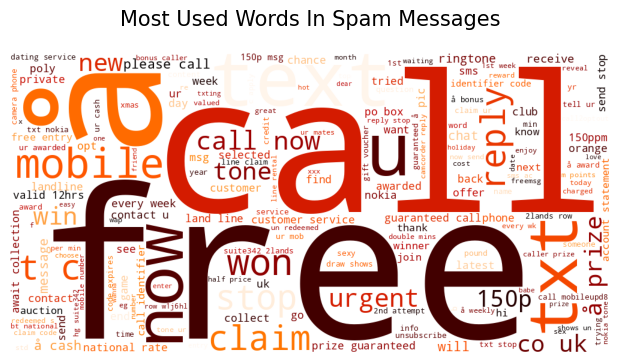

In [14]:
 #Splitting Spam Messages

#Splitting Spam Messages

spam_spam = spam[spam['label']=='spam'].copy() # Changed 'Category' to 'label'

# Chart - 2 WordCloud Plot Visualization Code For Most Used Words in Spam Messages
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in spam_spam.message: #Changed spam_wx to spam_spam and Message to message

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,8), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()



Plotting the label in dataset


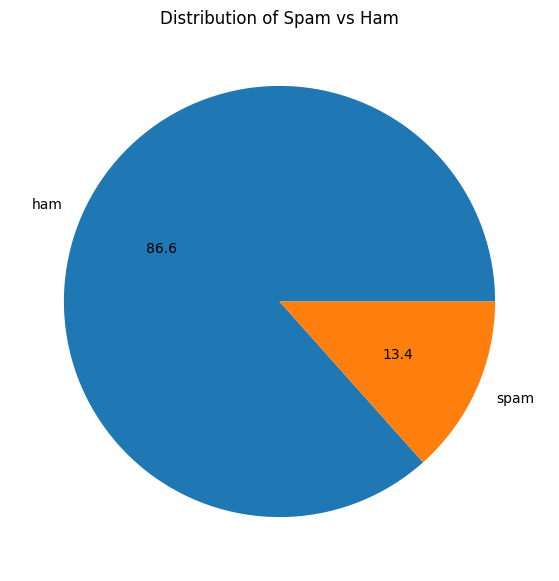

In [15]:
spam['label'].value_counts().plot(kind='pie', figsize=(10,7) ,autopct='%1.1f')
plt.title('Distribution of Spam vs Ham')
plt.ylabel('')  # Hides the y-label
plt.show()
plt.show()

**NLP**

Preprocessing The  Texts in the Datasets

In [16]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(spam)):
    review = re.sub('[^a-zA-Z]', ' ', spam['message'][i])
    review = review.lower()
    review = review.split()
    # Use nltk.corpus.stopwords.words instead of stopwords.words
    review = [ps.stem(word) for word in review if not word in nltk.corpus.stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Printing the first 5 values in the corpus list
corpus[1:11]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today']

In [17]:
# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


Creating Bag of words Model

In [18]:
cv = CountVectorizer(max_features = 4000)
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(spam['label'])
Y = Y.iloc[:, 1].values


**Data** **Modeling**

Splitting the Dataset into Training and Testing Set

In [19]:
# Splitting the data to train and test
# Updated the column names to match the dataframe
X_train, X_test, y_train, y_test = train_test_split(spam.message, spam.label, test_size=0.25) # Changed Spam to label, Message to message

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)


**Model** **Building**

Creating and Trainining the Models


In [22]:
from sklearn.neural_network import MLPClassifier # ANN MLP Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.preprocessing import StandardScaler


#Scale  Features for Better Experience
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Creating and Training Models

#Model 1 - Multi-Layer Perceptron Classifier using ANN
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=None,learning_rate='constant')
mlp.fit(X_train, Y_train)


MLPClassifier(max_iter=300)

In [23]:
# Model 2 - Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42,max_depth=4)
dt.fit(X_train_scaled, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

[Text(0.6125, 0.9, 'x[409] <= 1.001\ngini = 0.232\nsamples = 4457\nvalue = [3860, 597]'),
 Text(0.375, 0.7, 'x[3668] <= 2.175\ngini = 0.152\nsamples = 3976\nvalue = [3646, 330]'),
 Text(0.49375, 0.8, 'True  '),
 Text(0.2, 0.5, 'x[3930] <= 3.561\ngini = 0.104\nsamples = 3847\nvalue = [3635, 212]'),
 Text(0.1, 0.3, 'x[1260] <= 1.634\ngini = 0.084\nsamples = 3800\nvalue = [3633, 167]'),
 Text(0.05, 0.1, 'gini = 0.065\nsamples = 3721\nvalue = [3596, 125]'),
 Text(0.15, 0.1, 'gini = 0.498\nsamples = 79\nvalue = [37.0, 42.0]'),
 Text(0.3, 0.3, 'x[1385] <= 3.223\ngini = 0.081\nsamples = 47\nvalue = [2, 45]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 45\nvalue = [0, 45]'),
 Text(0.35, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.55, 0.5, 'x[2908] <= 6.138\ngini = 0.156\nsamples = 129\nvalue = [11, 118]'),
 Text(0.5, 0.3, 'x[225] <= 12.587\ngini = 0.132\nsamples = 127\nvalue = [9, 118]'),
 Text(0.45, 0.1, 'gini = 0.106\nsamples = 125\nvalue = [7, 118]'),
 Text(0.55, 0.1, 'gini = 0.0\

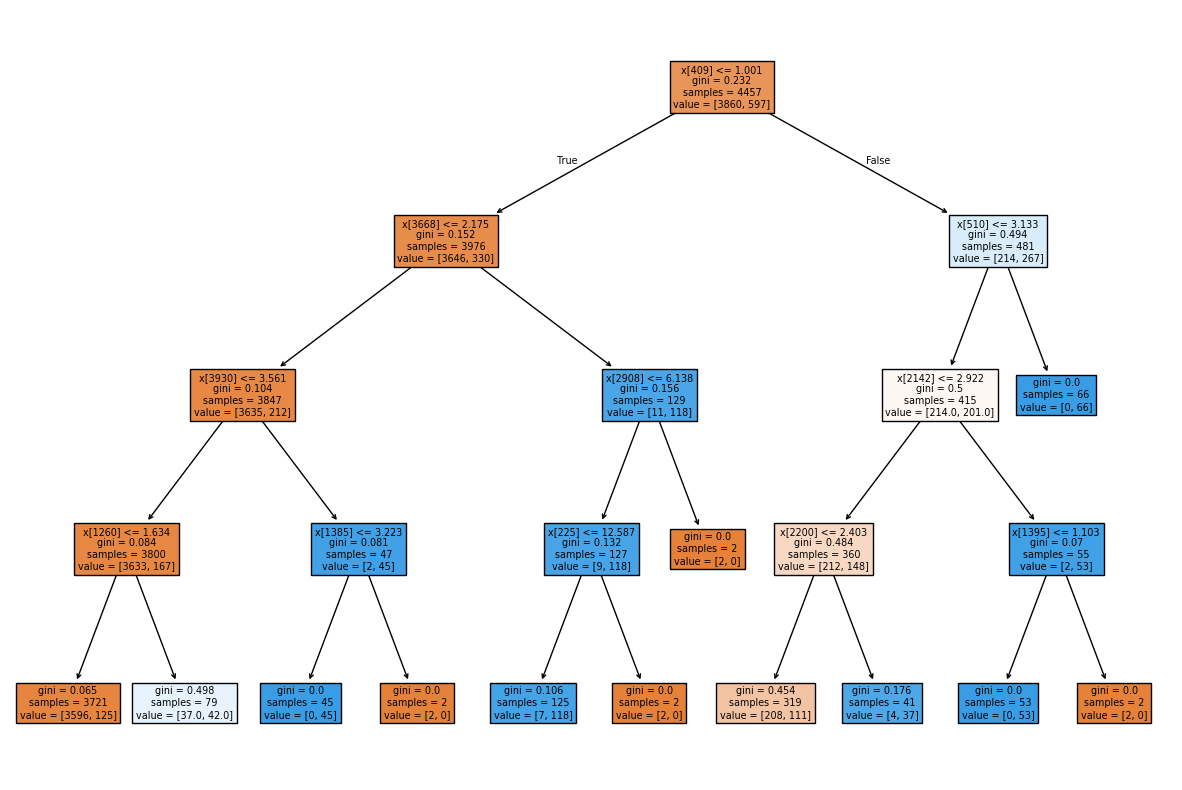

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)

In [25]:

from sklearn.model_selection import cross_val_score # Importing cross_val_score
# Computing the cross-validation score
dt_scores = cross_val_score(dt, X, Y, cv=10)  # cv=10 for 10-fold cross-validation

# Print the average cross-validation score
print(dt_scores.mean())

0.927138472230266


In [26]:
# Model 3 - Random Forest Classifier

from sklearn.model_selection import cross_val_score # Importing cross_val_score
rf= RandomForestClassifier(n_estimators=10,random_state=42)
score=cross_val_score(rf,X,Y,cv=10)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [27]:
print(score.mean())

0.9755905613147752


In [28]:
# Model 4 - Logistic Regresssion
from sklearn.linear_model import LogisticRegression  # Logistic Regression
lgr = LogisticRegression(random_state=42, max_iter=800)
lgr.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=800, random_state=42)

In [29]:
scr=cross_val_score(lgr,X,Y,cv=10) # computing cross-validation score of the model
print (scr.mean()) # Printting cross-validation score of the model

0.9834884139945819


In [52]:
# Model 5 - Multinomial Naïve Bayes
mnvb = MultinomialNB()
mnvb.fit(X_train, Y_train)

MultinomialNB()

In [53]:
# Calculate cross-validation scores
scoresnb = cross_val_score(mnvb, X, Y, cv=10)  # cv=10 for 10-fold cross-validation

# Print the average cross-validation score
print(scoresnb.mean())

0.982772533348777


In [30]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")


    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

In [60]:
# ML Model - 5 Implementation
# Create a machine learning pipeline using scikit-learn, combining text vectorization (CountVectorizer)
# and a Multinomial Naive Bayes classifier for email spam detection.
clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Step 1: Text data transformation
    ('nb', MultinomialNB())  # Step 2: Classification using Naive Bayes
])

# Model is trained (fit) and predicted in the evaluate model

In [39]:
# Calculate cross-validation scores
# Use the original text data (corpus) instead of the numerical representation (X)
scoresnb = cross_val_score(clf, corpus, Y, cv=10)  # cv=10 for 10-fold cross-validation

# Print the average cross-validation score
print(scoresnb.mean())

0.9860018789856053


**Prediction** **And** **Testing** **Of** **Models**

In [54]:
# Pediction Of Decision Tree Model
dt_pred=dt.predict(X_test_scaled)

# Pediction Of Random Forest Model
rf_pred=rf.predict(X_test_scaled)

# Pediction OfANN MLP Classifier Model
mlp_pred=mlp.predict(X_test_scaled)

# Prediction Of Logistic Regression Model
lgr_pred=lgr.predict(X_test_scaled)

# Prediction Of Multinomial Naive Bayes model
# Fit the pipeline to the training data before making predictions
mnvb_pred=mnvb.predict(X_test)


**Evaluation** **Of** **Models**

In [55]:
# Model 1 - Decision Tree Classifier
print("Decision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, dt_pred))
print("Accuracy: ", accuracy_score(Y_test, dt_pred))
print("_________________________________________________")

# Model 2 - Random Forest Classifier
print("Random Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, rf_pred))
print("Accuracy: ", accuracy_score(Y_test, rf_pred))
print("_________________________________________________")


# Model 3 - MLP Classifier
print("MLP Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, mlp_pred))
print("Accuracy: ", accuracy_score(Y_test, mlp_pred))
print("_________________________________________________")


# Model 4 - Logistic Regression
print("Logistic Regresssion")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, lgr_pred))
print("Accuracy: ", accuracy_score(Y_test, lgr_pred))
print("_________________________________________________")



# Model 5 - Multinomial Naïve Bayes
print("Multinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, mnvb_pred))
print("Accuracy: ", accuracy_score(Y_test, mnvb_pred))

Decision Tree Classifier
Confusion Matrix: 
[[955  10]
 [ 67  83]]
Accuracy:  0.9309417040358744
_________________________________________________
Random Forest Classifier
Confusion Matrix: 
[[963   2]
 [ 24 126]]
Accuracy:  0.9766816143497757
_________________________________________________
MLP Classifier
Confusion Matrix: 
[[824 141]
 [  6 144]]
Accuracy:  0.8681614349775785
_________________________________________________
Logistic Regresssion
Confusion Matrix: 
[[959   6]
 [ 19 131]]
Accuracy:  0.9775784753363229
_________________________________________________
Multinomial Naïve Bayes
Confusion Matrix: 
[[952  13]
 [  9 141]]
Accuracy:  0.9802690582959641


<Axes: >

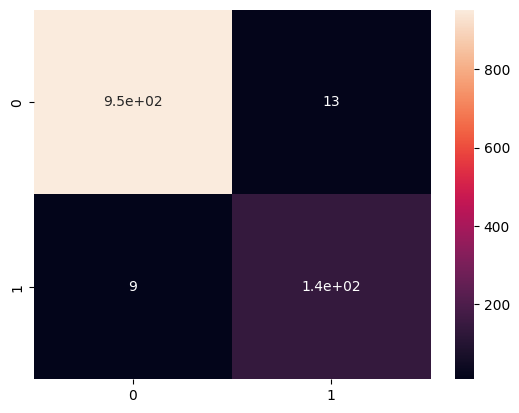

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, mnvb_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)


In [57]:
dt_report = classification_report(Y_test, dt_pred)
print("Classification Report for Decision Tree Classifier \n", dt_report)

rf_report = classification_report(Y_test, rf_pred)
print("Classification Report for Random Forest Classifier \n", rf_report)

mlp_report = classification_report(Y_test, mlp_pred)
print("Classification Report for MLP Classifier \n", mlp_report)

lgr_report = classification_report(Y_test, lgr_pred)
print("Classification Report for Logistic Regression \n", lgr_report)

mnvb_report = classification_report(Y_test, mnvb_pred)
print("Classification Report for Multinomial Naïve Bayes \n", mnvb_report)



Classification Report for Decision Tree Classifier 
               precision    recall  f1-score   support

       False       0.93      0.99      0.96       965
        True       0.89      0.55      0.68       150

    accuracy                           0.93      1115
   macro avg       0.91      0.77      0.82      1115
weighted avg       0.93      0.93      0.92      1115

Classification Report for Random Forest Classifier 
               precision    recall  f1-score   support

       False       0.98      1.00      0.99       965
        True       0.98      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Classification Report for MLP Classifier 
               precision    recall  f1-score   support

       False       0.99      0.85      0.92       965
        True       0.51      0.96      0.66       150

    accuracy                     

In [58]:
# Defining a function for the Email Spam Detection System
def detect_spam(email_text):
    # Load the trained classifier (clf) here
    # Replace the comment with your code to load the classifier model

    # Assuming you have training data X_train and Y_train

    # Fit the pipeline to your training data
    clf.fit(X_train, Y_train) # This line is added to train the model

    # Make a prediction using the loaded classifier
    prediction = clf.predict([email_text])

    if prediction == 0:
        return "This is a Ham Email!"
    else:
        return "This is a Spam Email!"


Multinomial Naive Bayes Classifier is the Best model

In [59]:

filename = "RFC.pkl"
pickle.dump(rf, open(filename, 'wb'))
filename = "DTC.pkl"
pickle.dump(dt, open(filename, 'wb'))
filename = "MNB.pkl"
pickle.dump(mnvb, open(filename, 'wb'))
filename = "LR.pkl"
pickle.dump(lgr, open(filename, 'wb'))
filename = "MLP.pkl"
pickle.dump(mlp, open(filename, 'wb'))
print("Saved all Models")

Saved all Models
